<a href="https://www.kaggle.com/code/rishitabansal/nebula-net?scriptVersionId=126035828" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nebulanet/samplesolutions.csv
/kaggle/input/nebulanet/train.csv
/kaggle/input/nebulanet/test.csv


# **This is my kaggle notebook for the first hackathon that I've won single handedly - IIT BHU(NebulaNet).**

# 1. Preliminary Data Analysis

## 1.1 Importing the libraries.

In [2]:
#importing and pre-processing data
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder

#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## 1.2 Dataset

### 1.2.1 Training dataset

In [3]:
df_train=pd.read_csv("/kaggle/input/nebulanet/train.csv")
df_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Umber Dwarfs,Red,M
1,3042,0.000500,0.1542,16.60,Umber Dwarfs,Red,M
2,2600,0.000300,0.1020,18.70,Umber Dwarfs,Red,M
3,2800,0.000200,0.1600,16.65,Umber Dwarfs,Red,M
4,1939,0.000138,0.1030,20.06,Umber Dwarfs,Red,M


### 1.2.2 Testing dataset

In [4]:
df_test=pd.read_csv("/kaggle/input/nebulanet/test.csv")
df_test.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,16500,0.01300,0.014,11.89,Blue White,B
1,2637,0.00073,0.127,17.22,Red,M
2,4980,0.35700,1.130,4.78,Yellowish,K
3,33421,352000.00000,67.000,-5.79,Blue,O
4,11096,112000.00000,12.000,-5.91,Blue,O


## 1.3 Columns & their Data Types

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         216 non-null    int64  
 1   Luminosity(L/Lo)        216 non-null    float64
 2   Radius(R/Ro)            216 non-null    float64
 3   Absolute magnitude(Mv)  216 non-null    float64
 4   Star type               216 non-null    object 
 5   Star color              216 non-null    object 
 6   Spectral Class          216 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 11.9+ KB


We have **three** different kinds of data types namely: 
* _object_
* _integer_ 
* _float_

Therefore, we need to convert all variables to the same datatype for classification.

## 1.3 Summary Statistics

In [6]:
df_train.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,216.000000,216.000000,216.000000,216.000000
mean,10211.055556,101421.163769,223.778661,4.528634
std,9214.606535,172474.272121,504.416657,10.475934
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000878,0.102750,-6.225500
50%,5776.000000,0.039000,0.702500,10.150000
75%,14366.750000,195750.000000,39.750000,13.830000
max,40000.000000,834042.000000,1948.500000,20.060000


1. There's no **missing data** as all counts are same.
2. There is **presence of outliers** in the dataset in various columns.
3. Most of the numerical data has **skewed distribution** which can be inferred by having a look at the 5 number summary given in the last 5 rows.

# 2. Exploratory Data Analysis

## 2.1 Visualising numerical columns

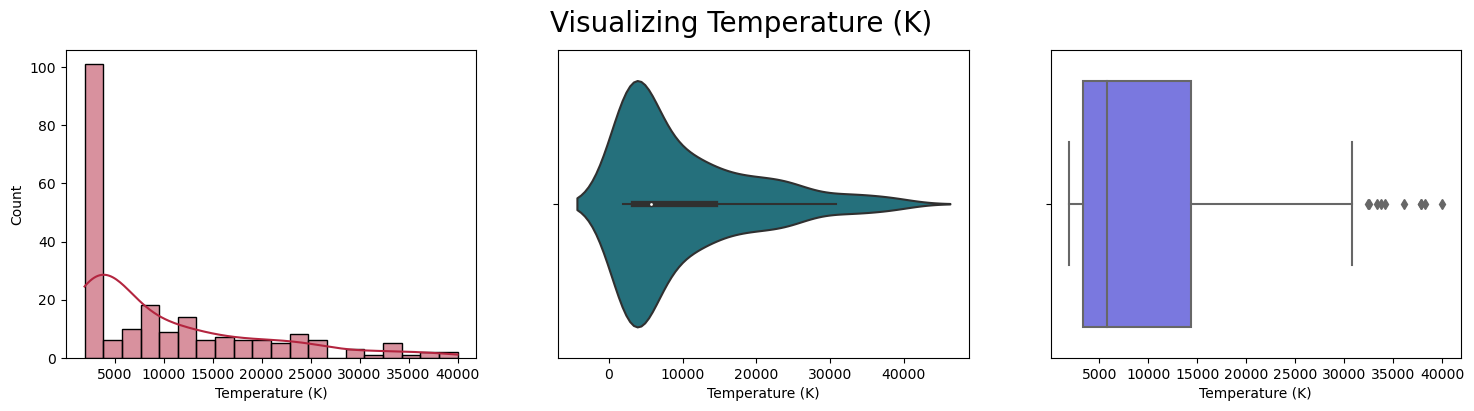

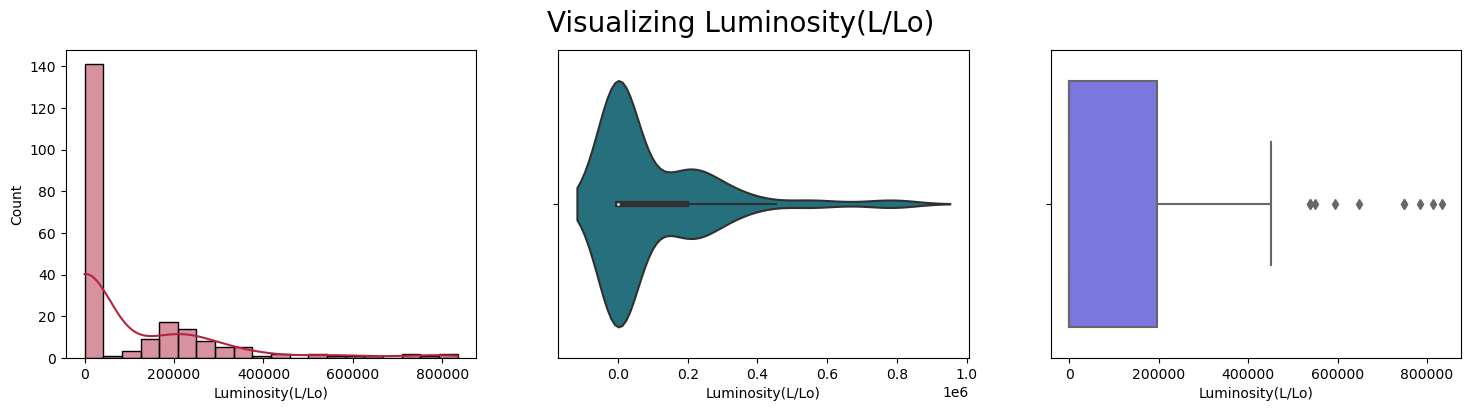

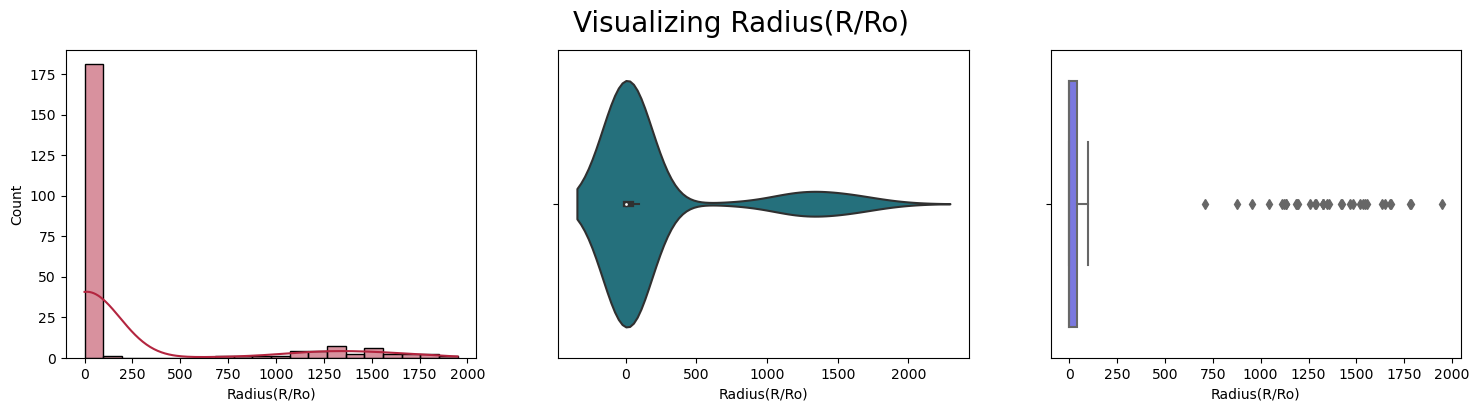

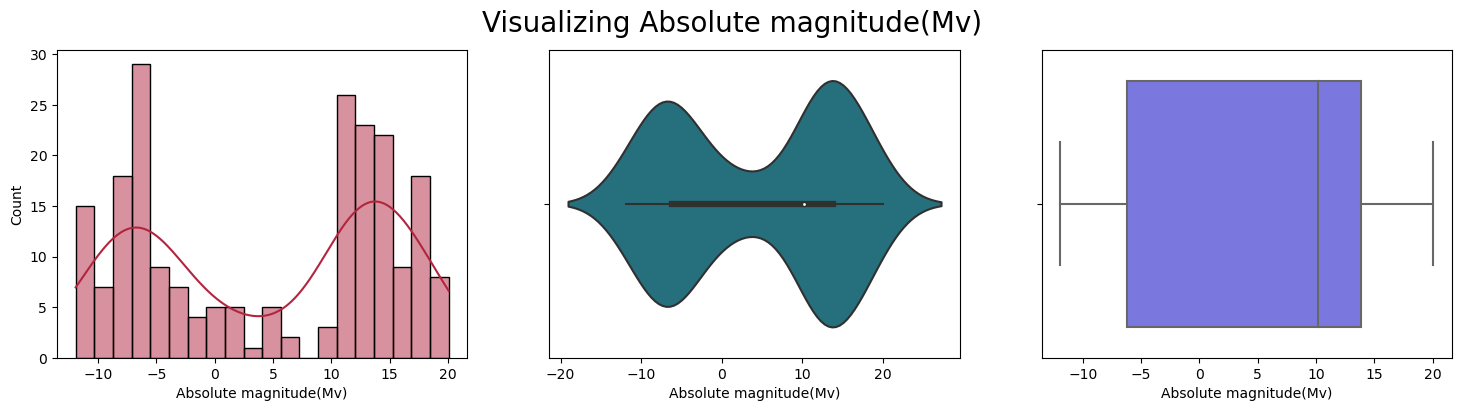

In [7]:
df1=df_train.drop(['Star type', 'Star color', 'Spectral Class'],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

### 2.1.1 Temperature:
> * The data for this parameter is left skewed and most of it lies between 5000 K - 15,000 K.
> * The outliers are mostly cold stars.

![](https://www.lightingdesignlab.com/sites/default/files/images/kelvin-temp.jpg)

### 2.1.2 Luminosity:
> * The data is left skewed.
> * Most of the data lies between 0-20,000(L/Lo) which depicts that the stars are quite luminous.
> * The outliers lie in above range for more bright stars.

### 2.1.3 Radius:
> * The data is left skewed.
> * 50% of the stars are smaller than our sun which has a radius of 1(R/Ro).
> * The outliers go at a high range starting from 750(R/Ro) - 2000(R/Ro).
> * Following image can be referred for visualization idea purpose.

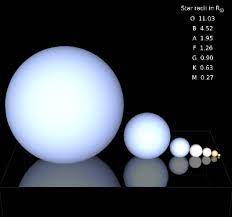

### 2.1.4 Absolute Magnitude:
> * The data distribution is peanut shaped where we can conclude that most of the values lie between -7(Mv) - 15(Mv).
> * Upon using this iamge as a refernce,we can see that most of our data is below -12 which means less luminous than sun and also our luminousity values show that only the outliers shine more bright than sun.

![](https://earthsky.org/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg)

## 2.2 Visualising Categorical Columns

### 2.2.1 Spectral Class

<AxesSubplot:ylabel='Spectral Class'>

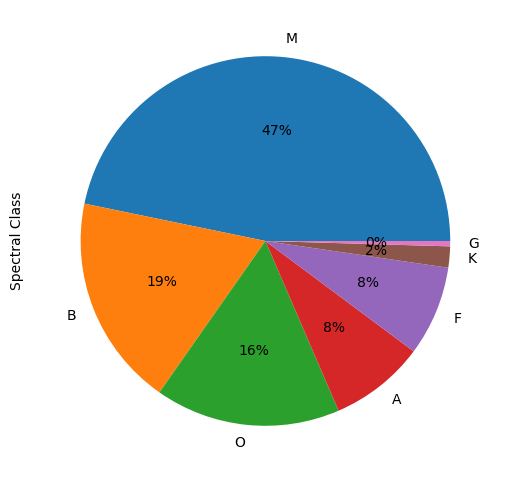

In [8]:
plt.figure(figsize=(15,6))
df_train["Spectral Class"].value_counts().plot(kind='pie',autopct='%.0f%%')

Following is the diagram for references:

![](https://astronomy.com/-/media/Images/Magazine%20Articles/2021/04/ScreenShot20210420at3.19.16PM.jpg?mw=600)
* Approximately 50% , i.e., half of the data lies in the spectral class of **M**. It has low temperatures which contains most of the data in the dataset.

### 2.2.2 Star Type

<AxesSubplot:ylabel='Star type'>

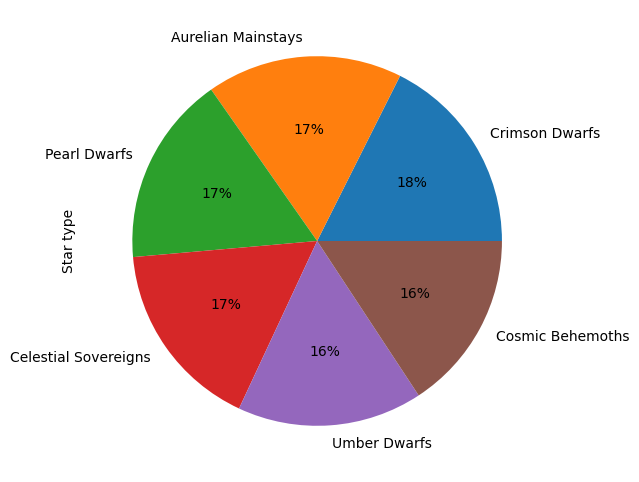

In [9]:
plt.figure(figsize=(15,6))
df_train["Star type"].value_counts().plot(kind='pie',autopct='%.0f%%')

* All the star types are equally present in the dataset which leads to minimum chances of a biased model.

### 2.2.3 Star Color

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


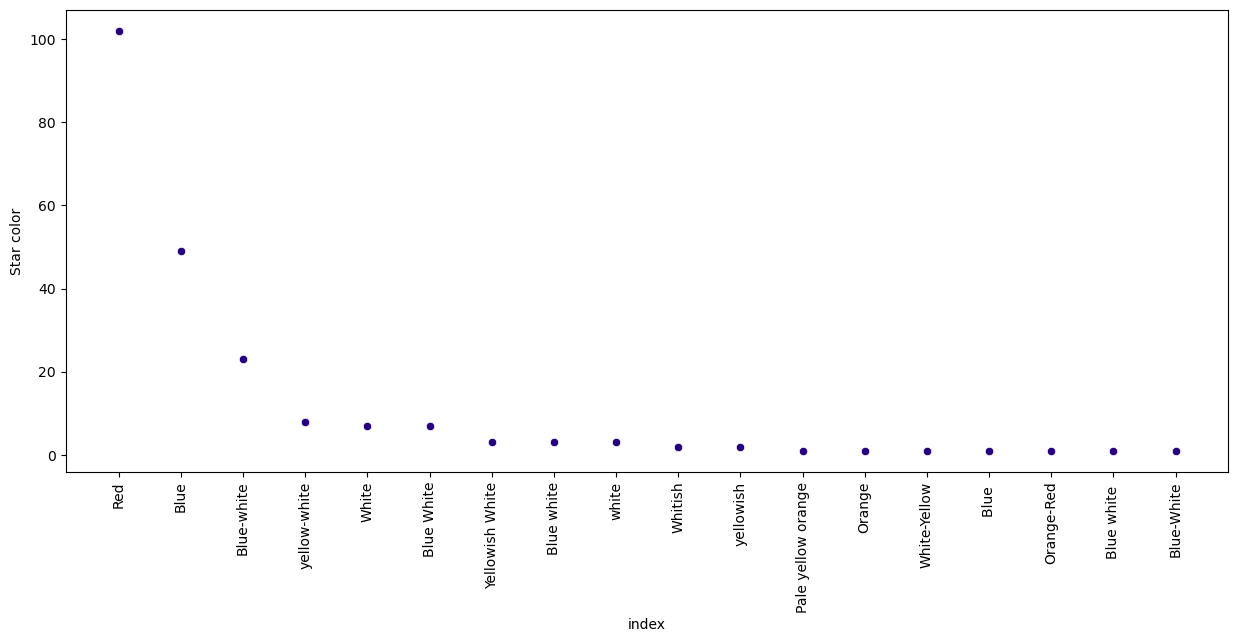

In [10]:
plt.figure(figsize=(15,6))
df_con=pd.DataFrame(data=df_train["Star color"].value_counts())
df_con=df_con.reset_index()
g=sns.scatterplot(data=df_train["Star color"], y=df_con["Star color"], x=df_con["index"],color="#250180")
g.set_xticklabels(
    labels=df_con["index"], rotation=90)
# Show the plot
plt.show()

* Most of the stars are red in color and is quite evident from our above insights as the spectral class **M** has maximum values.

# 3. Data pre-processing

## 3.1 Encoding Columns

### 3.1.1 Training Datset

In [11]:
le = LabelEncoder()
df_train["Star color"] = le.fit_transform(df_train["Star color"])
df_train["STAR TYPE"] = le.fit_transform(df_train["Star type"])
df_train["Spectral Class"] = le.fit_transform(df_train["Spectral Class"])
df_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,STAR TYPE
0,3068,0.002400,0.1700,16.12,Umber Dwarfs,10,5,5
1,3042,0.000500,0.1542,16.60,Umber Dwarfs,10,5,5
2,2600,0.000300,0.1020,18.70,Umber Dwarfs,10,5,5
3,2800,0.000200,0.1600,16.65,Umber Dwarfs,10,5,5
4,1939,0.000138,0.1030,20.06,Umber Dwarfs,10,5,5


### 3.1.2 Testing Dataset

In [12]:
le = LabelEncoder()
df_test["Star color"] = le.fit_transform(df_test["Star color"])
df_test["Spectral Class"] = le.fit_transform(df_test["Spectral Class"])
df_test.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,16500,0.01300,0.014,11.89,1,1
1,2637,0.00073,0.127,17.22,4,3
2,4980,0.35700,1.130,4.78,5,2
3,33421,352000.00000,67.000,-5.79,0,4
4,11096,112000.00000,12.000,-5.91,0,4


## 3.2 Visualizing Correlations

### 3.2.1 Heatmap 

<AxesSubplot:>

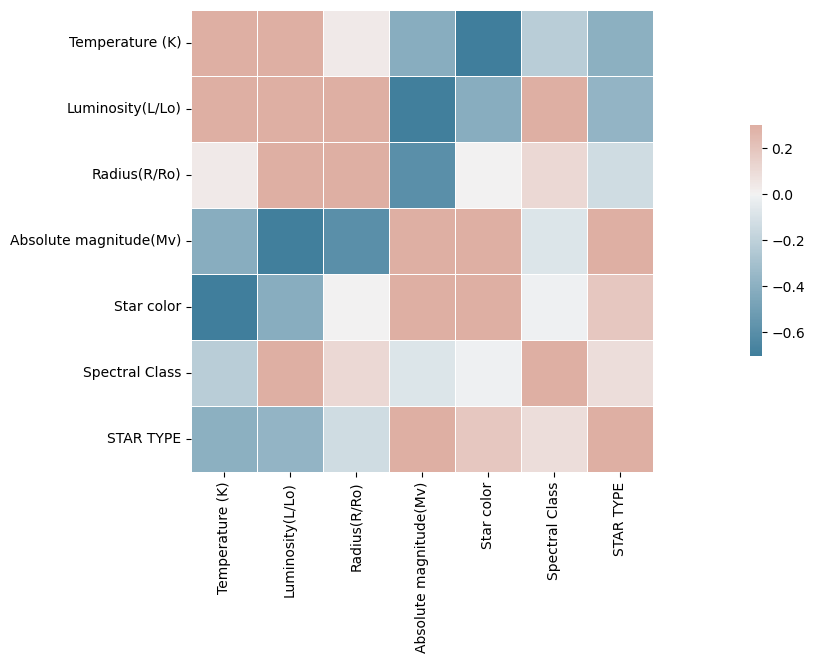

In [13]:
plt.figure(figsize=(25,6))
sns.heatmap(df_train.corr(),cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3.2.2 Filtering out significant correlated columns.

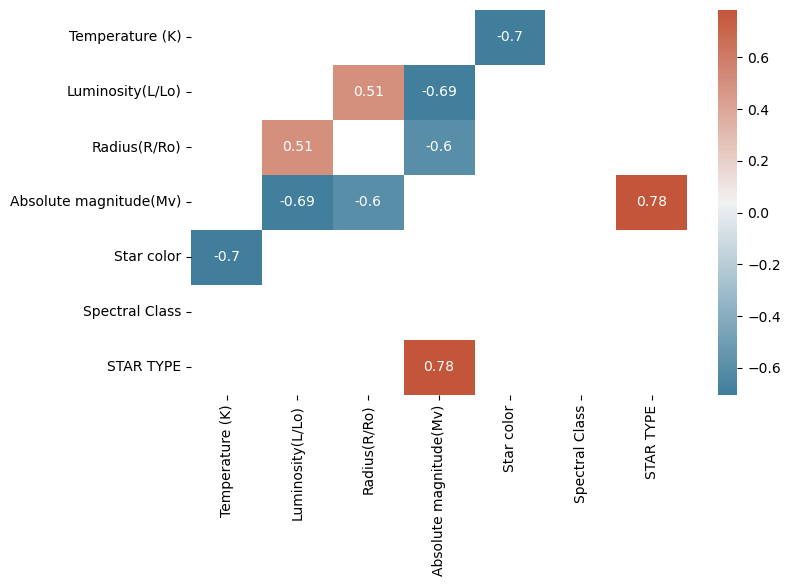

In [14]:
dfCorr = df_train.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

* We can see a strong positive correlation of **0.78** between **Star type** & **Absolute magnitude(Mv)**.
* We can see a strong negative correlation of **-0.7** between **Star color** & **Temperature(K)**.
* We can see a strong negative correlation of **-0.69** between **Luminosity(L/Lo)** & **Absolute magnitude(Mv)**.
* We can see a negative correlation of **-0.6** between **Radius(R/Ro)** & **Absolute magnitude(Mv)**.
* We can see a positive correlation of **0.51** between **Radius(R/Ro)** & **Luminosity(L/Lo)**.

# 4. Model Development & Classification

## 4.1 Data preparation

In [15]:
X_train= df_train.drop(['STAR TYPE','Star type'], axis = 1)
y_train= df_train['STAR TYPE']

## 4.2 Training the dataset

In [16]:
#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

## 4.3 Model Developement

### 4.3.1 Initiating the model

In [17]:
models = []
names = ['Random Forest','GaussianNB','DecisionTreeClassifier','Xgboost','LGBM']

models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((xgb.XGBClassifier()))
models.append((ltb.LGBMClassifier()))

### 4.3.2 Cross-vaildating models & choosing best fit.

In [18]:
kfold = KFold(n_splits=5)
for i in range(0,len(models)):    
    cv_result = cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))
    print ('Confusion Matrix:')
    print (confusion_matrix(y_val,prediction))
    print ('-'*40)
    print ('Classification Matrix:')
    print (classification_report(y_val,prediction))

----------------------------------------
Random Forest: 1.0
Confusion Matrix:
[[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 9]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

----------------------------------------
GaussianNB: 0.8863636363636364
Confusion Matrix:
[[7 0 0 0 2 0]
 [0 9 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 3 0 6]]
----------------------------------------
Cl

**Random Forest Classifier , Decision Tree Classifier & Xgboost** get 1 as accuracy score. We select **Random Forest Classifier**.

## 4.4 Testing the dataset

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction = rf.predict(df_test)
prediction

array([4, 5, 0, 1, 1, 2, 2, 4, 5, 4, 1, 4, 2, 1, 2, 2, 5, 3, 0, 5, 5, 3,
       2, 0])

## 4.5 Converting predictions back to original forms

In [20]:

mapping = {0: 'Aurelian Mainstays', 1: 'Celestial Sovereigns', 2: 'Cosmic Behemoths', 3: 'Crimson Dwarfs', 4: 'Pearl Dwarfs', 5: 'Umber Dwarfs'}

# Use a list comprehension to get the corresponding values for the encoded values
y_result = [mapping[x] for x in prediction]

# Print the corresponding values
print(y_result)


['Pearl Dwarfs', 'Umber Dwarfs', 'Aurelian Mainstays', 'Celestial Sovereigns', 'Celestial Sovereigns', 'Cosmic Behemoths', 'Cosmic Behemoths', 'Pearl Dwarfs', 'Umber Dwarfs', 'Pearl Dwarfs', 'Celestial Sovereigns', 'Pearl Dwarfs', 'Cosmic Behemoths', 'Celestial Sovereigns', 'Cosmic Behemoths', 'Cosmic Behemoths', 'Umber Dwarfs', 'Crimson Dwarfs', 'Aurelian Mainstays', 'Umber Dwarfs', 'Umber Dwarfs', 'Crimson Dwarfs', 'Cosmic Behemoths', 'Aurelian Mainstays']


In [21]:
y_result = pd.DataFrame(y_result)
df_test['Star type'] = y_result

# 5. Submission

In [22]:
submission = df_test.drop(['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star color','Spectral Class'], axis = 1)

In [23]:
submission['ID'] = range(1, len(submission) + 1)
submission.set_index('ID', inplace=True)
submission.index
submission = submission.to_csv("/kaggle/working/submission.csv",index_label='ID')

In [24]:
pd.read_csv("/kaggle/working/submission.csv", index_col = [0])

,Star type
ID,
1,Pearl Dwarfs
2,Umber Dwarfs
3,Aurelian Mainstays
4,Celestial Sovereigns
5,Celestial Sovereigns
6,Cosmic Behemoths
7,Cosmic Behemoths
8,Pearl Dwarfs
9,Umber Dwarfs
